# Homework 1 and 2 and 3

Importing necessary libraries.

In [812]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Reading the data from csv file:

In [814]:
data = pd.read_csv("matches.csv")
data.fillna(0)
data.head()
home_goals  = list()
away_goals = list()
home_away_goals = list()

Let's grab the data for only English Premier League which its ID is 148:

In [818]:
x = data['league_id'] == 148
data = data[x]

In [819]:
data.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148
5,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0.0,6.0,0.0,3.0,0.0,3.0,NaN,NaN,148
6,2629,2621,13327,1505570400,Finished,0,Liverpool,Burnley,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,148
7,2641,2654,13456,1505570400,Finished,0,Sheffield Utd,Norwich,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148
27,2617,2616,13324,1505651400,Finished,0,Chelsea,Arsenal,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,148


Assing home team goals and away team goals in seperate lists.

In [820]:
home_goals = data["match_hometeam_score"].tolist()
away_goals = data["match_awayteam_score"].tolist()

Let's see how big our dataset.

In [821]:
data["match_hometeam_score"].to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 1 to 5161
Data columns (total 1 columns):
match_hometeam_score    618 non-null float64
dtypes: float64(1)
memory usage: 9.8 KB


Let's create another list for results combining home and away goals.

In [823]:
for i in range(618):
    home_away_goals.append(str(home_goals[i]) + "-" + str(away_goals[i]))

Let's see the histogram of home team goals.

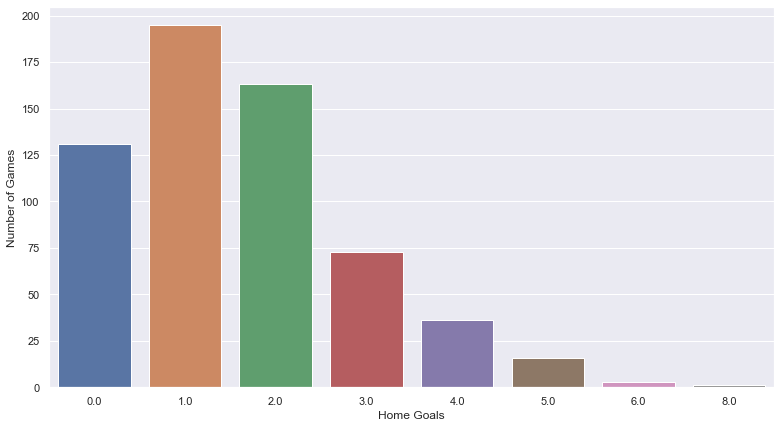

In [824]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
ax = sns.countplot(x=home_goals)
ax.set(xlabel='Home Goals', ylabel='Number of Games')
plt.show()

And away goals:

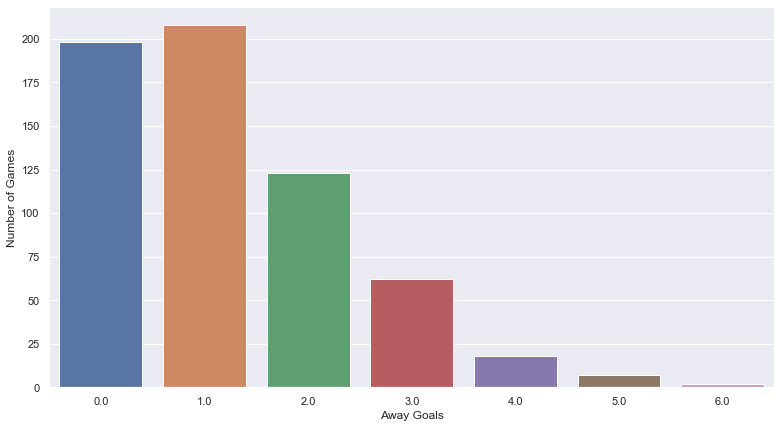

In [825]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
ax = sns.countplot(x=away_goals)
ax.set(xlabel='Away Goals', ylabel='Number of Games')
plt.show()

And which results are more likely to occur in matches:

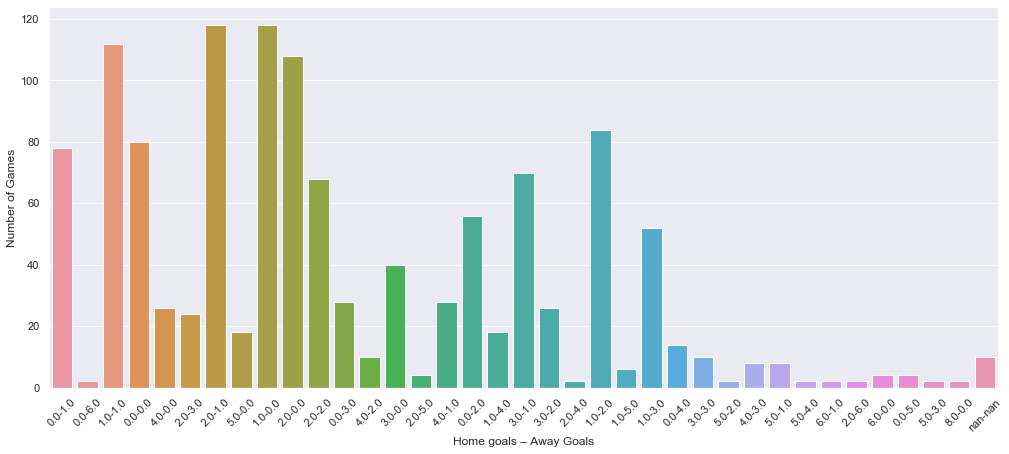

In [826]:
plt.figure(figsize=(17,7))
ax = sns.countplot(x=home_away_goals)
ax.set(xlabel='Home goals – Away Goals', ylabel='Number of Games')
plt.xticks(rotation=45)
plt.show()

It looks like distribution of away goals looks like poisson distribution.

In [250]:
aways = data.match_awayteam_score.dropna().astype(int)
dats = list()
for i in aways:
    dats.append(int(i))

In [827]:
from scipy import stats
from scipy.stats import norm

When we try to plot distribituon :

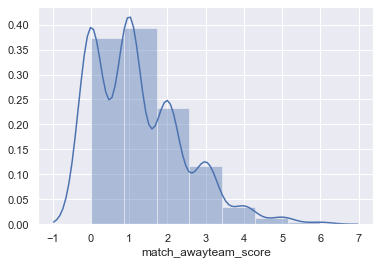

In [831]:
sns.distplot(data.match_awayteam_score.dropna(), bins=7)

# Task 2

In [282]:
books = pd.read_csv("booking.csv")
books.head()

,match_id,time,home_fault,card,away_fault
0,13327,90+3,Can E.,yellow card,NaN
1,13329,29,Holebas J.,yellow card,NaN
2,13329,40,Doucoure A.,yellow card,NaN
3,13331,33,Cabaye Y.,yellow card,NaN
4,13331,50,Puncheon J.,yellow card,NaN


In [863]:
bets = pd.read_csv("bets.csv")
bets.head()

,match_id,odd_bookmakers,odd_epoch,variable,value
0,146845,BetOlimp,1486301854,odd_1,1.96
1,151780,10Bet,1486314920,odd_1,2.15
2,151780,18bet,1486314920,odd_1,2.17
3,151780,1xBet,1486314920,odd_1,2.20
4,151780,5Dimes,1486314920,odd_1,2.23


**odd_x : Draw**

**odd_1 : Home Wins**

**odd_2 : Away Wins**

Let's create another column which contains the probabilities that has been given by bookmakers using <br><br> $$\frac {1}{P(value)}$$

In [864]:
prob = list()
for i in bets.value:
    try:
        temp = 1/i
        prob.append(temp)
    except:
        temp = 0
        prob.append(temp)

bets["possibility"] = prob

In [865]:
bets["possibility"].head()

0    0.510204
1    0.465116
2    0.460829
3    0.454545
4    0.448430
Name: possibility, dtype: float64

### Lets create another column into our matches data to see if a match ended in a draw or no:

In [866]:
data["results"] =  data["match_awayteam_score"] == data["match_hometeam_score"]
data.results.head()

1     False
5     False
6      True
7     False
27     True
Name: results, dtype: bool

In [867]:
data.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,results
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148,False
5,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0.0,6.0,0.0,3.0,0.0,3.0,NaN,NaN,148,False
6,2629,2621,13327,1505570400,Finished,0,Liverpool,Burnley,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,148,True
7,2641,2654,13456,1505570400,Finished,0,Sheffield Utd,Norwich,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148,False
27,2617,2616,13324,1505651400,Finished,0,Chelsea,Arsenal,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,148,True


In [868]:
bets.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility
0,146845,BetOlimp,1486301854,odd_1,1.96,0.510204
1,151780,10Bet,1486314920,odd_1,2.15,0.465116
2,151780,18bet,1486314920,odd_1,2.17,0.460829
3,151780,1xBet,1486314920,odd_1,2.20,0.454545
4,151780,5Dimes,1486314920,odd_1,2.23,0.448430


We filter the Bets data to get only draw bets. And add a new column named **draw** to which contain a boolean data according to the match result, Draw or No. We make it all False for now.

In [892]:
x = bets['variable'] == 'odd_x'
bets["draw"] = False
bets_draw = bets[x]

In [893]:
bets_draw.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,draw
35,146845,BetOlimp,1486301854,odd_x,3.49,0.286533,False
36,151780,10Bet,1486314920,odd_x,3.15,0.317460,False
37,151780,18bet,1486314920,odd_x,3.12,0.320513,False
38,151780,1xBet,1486314920,odd_x,3.24,0.308642,False
39,151780,5Dimes,1486314920,odd_x,3.19,0.313480,False


In [873]:
data.results.value_counts()

False    493
True     135
Name: results, dtype: int64

In [875]:
count = int()
for index, row in bets_draw.iterrows():
    id = row["match_id"]
    match = data.query(f'match_id == {id}')
    if len(match) > 0:
        if match.results.values[0]:
            count+=1
            bets_draw.at[index,'draw'] = True

In [880]:
count

3783

In [881]:
bets_draw.draw.value_counts()

False    140999
True       3783
Name: draw, dtype: int64

In [885]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [895]:
indexes = list()
with tqdm(total = len(bets_draw)) as pbar:
    for index,row in bets_draw.iterrows():
        id = row['match_id']
        match = data.query(f'match_id == {id}')
        if len(match) == 0:
            indexes.append(index)
        elif len(match) > 0:
            bets_draw.at[index,'draw'] = True
        pbar.update(1)

bets_draw = bets_draw.drop(indexes)

In [896]:
bets_draw.draw.value_counts()

True    19660
Name: draw, dtype: int64

We put 4 different dataset of draw bets from 4 different Bookmakers into a python list named **makers**

In [477]:
bookmakers = bets[x].odd_bookmakers.unique().tolist()  # Get a list of bookmakers.
#type(bookmakers)

makers = list()

for i in bookmakers[:4]:  #For the first 4 bookmakers in the list bookmakers. We get their data into makers list.
    bookmaker = bets[x]['odd_bookmakers'] == i
    
    makers.append(bets[x][bookmaker])

Lets see the first element of the list makers to have a better understanding of what we done.

First element of makers list contains data of BetOlimp bookmakers draw data.

In [478]:
makers[0].head(15)

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,draw
35,146845,BetOlimp,1486301854,odd_x,3.49,0.286533,False
42,151780,BetOlimp,1486314920,odd_x,3.15,0.317460,False
59,151781,BetOlimp,1486314941,odd_x,3.28,0.304878,False
166,147990,BetOlimp,1486710451,odd_x,3.23,0.309598,False
183,148000,BetOlimp,1486710493,odd_x,2.99,0.334448,False
200,148001,BetOlimp,1486710502,odd_x,3.22,0.310559,False
378,147991,BetOlimp,1486797015,odd_x,3.51,0.284900,False
395,147992,BetOlimp,1486797022,odd_x,5.03,0.198807,False
412,147993,BetOlimp,1486797032,odd_x,4.59,0.217865,False
429,147995,BetOlimp,1486710471,odd_x,3.54,0.282486,False


When we need to check if a match ended in a draw or no from its match_id it is more simple to have a dataset like below:

In [473]:
match_results = data.iloc[:,[2,-1]]
match_results.head()

,match_id,results
0,41196,True
1,13331,False
2,17683,False
3,17684,False
4,17682,False


### 4 Bookmakers that we are Going to Analyse their Draw Possiblities

In [538]:
for i in makers:
    print(i.odd_bookmakers.unique())
    continue

['BetOlimp']
['10Bet']
['18bet']
['1xBet']


Now let's turn the "draw" column in each element of makers list which belongs to different bookamkers to True or False if correnponding match ended in draw.

To do that we need to check match ID's from the small dataset we created called match_results

In [480]:
for index,rows in makers[0].iterrows():
    id = rows['match_id']
    if match_results.query(f'match_id == {id}').results.values[0]:
        makers[0].at[index,'draw'] = True

In [499]:
for index,rows in makers[1].iterrows():
    id = rows['match_id']
    if match_results.query(f"match_id == {id}").results.values[0]:
        makers[1].at[index,'draw'] = True

In [501]:
for index,rows in makers[2].iterrows():
    id = rows['match_id']
    if match_results.query(f"match_id == {id}").results.values[0]:
        makers[2].at[index,'draw'] = True

In [502]:
for index,rows in makers[3].iterrows():
    id = rows['match_id']
    if match_results.query(f"match_id == {id}").results.values[0]:
        makers[3].at[index,'draw'] = True

### Splitting Probabilities into Bins for the Bookmaker BetOlimp

Now we split datasets into bins by their probability of draw.

### **Probabibility Range of Bins**

- ( 0.0 - 0.10 ]
- ( 0.10 - 0.20 ]
- ( 0.20 - 0.30 ]
- ( 0.30 - 0.40 ]

In [581]:
bins_for_betolimp = list()

In [623]:
x = makers[0][np.logical_and(makers[0]['possibility'] > 0.0 , makers[0]['possibility'] <= 0.10)]
x2 = makers[0][np.logical_and(makers[0]['possibility'] > 0.10 , makers[0]['possibility'] <= 0.20)]
x3 = makers[0][np.logical_and(makers[0]['possibility'] > 0.20 , makers[0]['possibility'] <= 0.30)]
x4 = makers[0][np.logical_and(makers[0]['possibility'] > 0.30 , makers[0]['possibility'] <= 0.40)]


x5 = makers[0][np.logical_and(makers[0]['possibility'] > 0.40 , makers[0]['possibility'] <= 0.50)]
x6 = makers[0][np.logical_and(makers[0]['possibility'] > 0.50 , makers[0]['possibility'] <= 0.60)]
x7 = makers[0][np.logical_and(makers[0]['possibility'] > 0.60 , makers[0]['possibility'] <= 0.70)]
x8 = makers[0][np.logical_and(makers[0]['possibility'] > 0.70 , makers[0]['possibility'] <= 0.80)]

Note that there are no probability of draw biger than 0.40 for some datasets.

In [624]:
bins_for_betolimp = list()
bins_for_betolimp.append(x)
bins_for_betolimp.append(x2)
bins_for_betolimp.append(x3)
bins_for_betolimp.append(x4)
bins_for_betolimp.append(x5)

In [630]:
x = makers[1][np.logical_and(makers[1]['possibility'] > 0.0 , makers[1]['possibility'] <= 0.10)]
x2 = makers[1][np.logical_and(makers[1]['possibility'] > 0.10 , makers[1]['possibility'] <= 0.20)]
x3 = makers[1][np.logical_and(makers[1]['possibility'] > 0.20 , makers[1]['possibility'] <= 0.30)]
x4 = makers[1][np.logical_and(makers[1]['possibility'] > 0.30 , makers[1]['possibility'] <= 0.40)]


x5 = makers[1][np.logical_and(makers[1]['possibility'] > 0.40 , makers[1]['possibility'] <= 0.50)]
x6 = makers[1][np.logical_and(makers[1]['possibility'] > 0.50 , makers[1]['possibility'] <= 0.60)]
x7 = makers[1][np.logical_and(makers[1]['possibility'] > 0.60 , makers[1]['possibility'] <= 0.70)]
x8 = makers[1][np.logical_and(makers[1]['possibility'] > 0.70 , makers[1]['possibility'] <= 0.80)]

In [631]:
bins_for_10bet = list()

bins_for_10bet.append(x)
bins_for_10bet.append(x2)
bins_for_10bet.append(x3)
bins_for_10bet.append(x4)
bins_for_10bet.append(x5)

In [633]:
x = makers[2][np.logical_and(makers[2]['possibility'] > 0.0 , makers[2]['possibility'] <= 0.10)]
x2 = makers[2][np.logical_and(makers[2]['possibility'] > 0.10 , makers[2]['possibility'] <= 0.20)]
x3 = makers[2][np.logical_and(makers[2]['possibility'] > 0.20 , makers[2]['possibility'] <= 0.30)]
x4 = makers[2][np.logical_and(makers[2]['possibility'] > 0.30 , makers[2]['possibility'] <= 0.40)]


x5 = makers[2][np.logical_and(makers[2]['possibility'] > 0.40 , makers[2]['possibility'] <= 0.50)]
x6 = makers[2][np.logical_and(makers[2]['possibility'] > 0.50 , makers[2]['possibility'] <= 0.60)]
x7 = makers[2][np.logical_and(makers[2]['possibility'] > 0.60 , makers[2]['possibility'] <= 0.70)]
x8 = makers[2][np.logical_and(makers[2]['possibility'] > 0.70 , makers[2]['possibility'] <= 0.80)]

In [634]:
bins_for_18bet = list()

bins_for_18bet.append(x)
bins_for_18bet.append(x2)
bins_for_18bet.append(x3)
bins_for_18bet.append(x4)
bins_for_18bet.append(x5)

In [636]:
x = makers[3][np.logical_and(makers[3]['possibility'] > 0.0 , makers[3]['possibility'] <= 0.10)]
x2 = makers[3][np.logical_and(makers[3]['possibility'] > 0.10 , makers[3]['possibility'] <= 0.20)]
x3 = makers[3][np.logical_and(makers[3]['possibility'] > 0.20 , makers[3]['possibility'] <= 0.30)]
x4 = makers[3][np.logical_and(makers[3]['possibility'] > 0.30 , makers[3]['possibility'] <= 0.40)]


x5 = makers[3][np.logical_and(makers[3]['possibility'] > 0.40 , makers[3]['possibility'] <= 0.50)]
x6 = makers[3][np.logical_and(makers[3]['possibility'] > 0.50 , makers[3]['possibility'] <= 0.60)]
x7 = makers[3][np.logical_and(makers[3]['possibility'] > 0.60 , makers[3]['possibility'] <= 0.70)]
x8 = makers[3][np.logical_and(makers[3]['possibility'] > 0.70 , makers[3]['possibility'] <= 0.80)]

In [637]:
bins_for_1xbet = list()

bins_for_1xbet.append(x)
bins_for_1xbet.append(x2)
bins_for_1xbet.append(x3)
bins_for_1xbet.append(x4)
bins_for_1xbet.append(x5)

### Estimated Probability of Draws For BetOlimp

When we divide the number of matches ended in draw in the $Bin_i$ with the total number of matches in $Bin_i$: <br>

$$Estimated\space Probability\space of\space Draw = \frac{Number\space of\space Matches\space Ended\space In\space Draw\space in\space Bin_i}{Number\space of\space Matches\space In\space Bin_i}$$

In [626]:
print("\nBetOlimp Estimated Probability of Draws\n\n")
print("Bookmakers Probability : Estimated Probability")
for i in bins_for_betolimp:
    k = i.draw == True
    try:
        print("(" + str(round(i.possibility.min(),2)) + " - " + str(round(i.possibility.max(),2)) +  "]        :        " + str(round(len(i[k])/len(i),2)))
    except:
        pass
    


BetOlimp Estimated Probability of Draws


Bookmakers Probability : Estimated Probability
(0.07 - 0.1]        :        0.0
(0.1 - 0.2]        :        0.19
(0.2 - 0.3]        :        0.24
(0.3 - 0.4]        :        0.27


### Estimated Probability of Draws For 10Bet

In [632]:
print("\n10Bet Estimated Probability of Draws\n\n")
print("Bookmakers Probability : Estimated Probability")
for i in bins_for_10bet:
    k = i.draw == True
    try:
        print("(" + str(round(i.possibility.min(),2)) + " - " + str(round(i.possibility.max(),2)) +  "]        :         " + str(round(len(i[k])/len(i),2)))
    except:
        pass


10Bet Estimated Probability of Draws


Bookmakers Probability : Estimated Probability
(0.07 - 0.1]        :         0.09
(0.1 - 0.2]        :         0.12
(0.2 - 0.3]        :         0.24
(0.3 - 0.39]        :         0.28


### Estimated Probability of Draws For 18Bet

In [635]:
print("\n18Bet Estimated Probability of Draws\n\n")
print("Bookmakers Probability : Estimated Probability")
for i in bins_for_18bet:
    k = i.draw == True
    try:
        print("(" + str(round(i.possibility.min(),2)) + " - " + str(round(i.possibility.max(),2)) +  "]        :         " + str(round(len(i[k])/len(i),2)))
    except:
        pass


18Bet Estimated Probability of Draws


Bookmakers Probability : Estimated Probability
(0.07 - 0.1]        :         0.1
(0.11 - 0.2]        :         0.13
(0.2 - 0.3]        :         0.24
(0.3 - 0.4]        :         0.29


### Estimated Probability of Draws For 1xBet

In [642]:
print("\n1xBet Estimated Probability of Draws\n\n")
print("Bookmakers Probability : Estimated Probability")
for i in bins_for_1xbet:
    k = i.draw == True
    try:
        print("(" + str(round(i.possibility.min(),2)) + " - " + str(round(i.possibility.max(),2)) +  "]        :         " + str(round(len(i[k])/len(i),2)))
    except:
        pass


1xBet Estimated Probability of Draws


Bookmakers Probability : Estimated Probability
(0.07 - 0.1]        :         0.04
(0.1 - 0.2]        :         0.16
(0.2 - 0.3]        :         0.24
(0.3 - 0.39]        :         0.3
(0.4 - 0.41]        :         0.0


Since we are done with the draw boolen column, we can dop it:

In [ ]:
bets = bets.drop(['draw'], axis=1)

Now let's take a look at the home win bets:

In [747]:
#bets = bets.drop(['away_win'], axis=1)
x = bets['variable'] == 'odd_1'
bets["home_win"] = False
bets[x].head(10)

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,home_win
0,146845,BetOlimp,1486301854,odd_1,1.96,0.510204,False
1,151780,10Bet,1486314920,odd_1,2.15,0.465116,False
2,151780,18bet,1486314920,odd_1,2.17,0.460829,False
3,151780,1xBet,1486314920,odd_1,2.20,0.454545,False
4,151780,5Dimes,1486314920,odd_1,2.23,0.448430,False
5,151780,bet-at-home,1486314920,odd_1,2.12,0.471698,False
6,151780,bet365,1486314920,odd_1,2.20,0.454545,False
7,151780,BetOlimp,1486314920,odd_1,2.19,0.456621,False
8,151780,Betrally,1486314920,odd_1,2.15,0.465116,False
9,151780,BetVictor,1486314920,odd_1,2.20,0.454545,False


In [748]:
bookmakers = bets[x].odd_bookmakers.unique().tolist()
type(bookmakers)

makers_1 = list()

for i in bookmakers[:4]:
    bookmaker = bets[x]['odd_bookmakers'] == i
    
    makers_1.append(bets[x][bookmaker])

In [749]:
bets.query(f'match_id == 146845')

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,home_win
0,146845,BetOlimp,1486301854,odd_1,1.96,0.510204,False
35,146845,BetOlimp,1486301854,odd_x,3.49,0.286533,False
70,146845,BetOlimp,1486301854,odd_2,3.65,0.273973,False


In [750]:
makers_1[0].head()

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,home_win
0,146845,BetOlimp,1486301854,odd_1,1.96,0.510204,False
7,151780,BetOlimp,1486314920,odd_1,2.19,0.456621,False
24,151781,BetOlimp,1486314941,odd_1,2.95,0.338983,False
111,147990,BetOlimp,1486710451,odd_1,2.14,0.467290,False
128,148000,BetOlimp,1486710493,odd_1,2.50,0.400000,False


In [751]:
data.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,results
0,7109,7097,41196,1505559600,Finished,0,Levante,Valencia,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,468,True
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148,False
2,3224,3238,17683,1505568600,Finished,0,Eintracht Frankfurt,FC Augsburg,1.0,2.0,0.0,1.0,0.0,1.0,NaN,NaN,195,False
3,3235,3223,17684,1505568600,Finished,0,SV Werder Bremen,Schalke,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,195,False
4,3237,3225,17682,1505568600,Finished,0,Bayern Munich,1. FSV Mainz 05,4.0,0.0,2.0,0.0,2.0,0.0,NaN,NaN,195,False


We extract the part of the data which has home team wins. Since we dont have a column that tells us the result, we compare goals of home teams and away teams and add the matches with bigger home team goals to the new dataset called **home_wins**

In [752]:
home_wins = data[data['match_hometeam_score'] > data['match_awayteam_score']]
home_wins.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,results
4,3237,3225,17682,1505568600,Finished,0,Bayern Munich,1. FSV Mainz 05,4.0,0.0,2.0,0.0,2.0,0.0,NaN,NaN,195,False
8,2642,2650,13448,1505570400,Finished,0,Bristol City,Derby,4.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,149,False
10,2645,2648,13453,1505570400,Finished,0,Middlesbrough,QPR,3.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,149,False
13,2653,2638,13454,1505570400,Finished,0,Millwall,Leeds,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,149,False
14,7110,7115,41313,1505570400,Finished,0,Valladolid,Granada CF,2.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,468,False


In [753]:
for i in makers_1:
    for index,rows in i.iterrows():
        id = rows['match_id']
        if len(home_wins.query(f'match_id == {id}')) > 0:
            i.at[index,'home_win'] = True

In [755]:
bins_for_10bet_1 = list()
bins_for_18bet_1 = list()
bins_for_betolimp_1 = list()
bins_for_1xbet_1 = list()

for i in makers_1:
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == 'BetOlimp':
        while poss <= 0.90:
            bins_for_betolimp_1.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '10Bet':
        while poss <= 0.90:
            bins_for_10bet_1.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '18Bet':
        while poss <= 0.90:
            bins_for_18bet_1.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '1xBet':
        while poss <= 0.90:
            bins_for_10bet_1.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0

In [757]:
for i in makers_1:
    print(i['odd_bookmakers'].unique().tolist())
    

['BetOlimp']
['10Bet']
['18bet']
['1xBet']


In [730]:
#bets = bets.drop(['home_win'], axis = 1)
x = bets['variable'] == 'odd_2'
bets["away_win"] = False
bets[x].head()

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,away_win
70,146845,BetOlimp,1486301854,odd_2,3.65,0.273973,False
71,151780,10Bet,1486314920,odd_2,3.70,0.270270,False
72,151780,18bet,1486314920,odd_2,3.32,0.301205,False
73,151780,1xBet,1486314920,odd_2,3.88,0.257732,False
74,151780,5Dimes,1486314920,odd_2,3.82,0.261780,False


In [731]:
bookmakers = bets[x].odd_bookmakers.unique().tolist()
type(bookmakers)

makers_2 = list()

for i in bookmakers[:4]:
    bookmaker = bets[x]['odd_bookmakers'] == i
    
    makers_2.append(bets[x][bookmaker])

In [732]:
away_wins = data[data['match_hometeam_score'] < data['match_awayteam_score']]
away_wins.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,results
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148,False
2,3224,3238,17683,1505568600,Finished,0,Eintracht Frankfurt,FC Augsburg,1.0,2.0,0.0,1.0,0.0,1.0,NaN,NaN,195,False
3,3235,3223,17684,1505568600,Finished,0,SV Werder Bremen,Schalke,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,195,False
5,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0.0,6.0,0.0,3.0,0.0,3.0,NaN,NaN,148,False
7,2641,2654,13456,1505570400,Finished,0,Sheffield Utd,Norwich,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148,False


In [733]:
for i in makers_2:
    for index,rows in i.iterrows():
        id = rows['match_id']
        if len(away_wins.query(f'match_id == {id}')) > 0:
            i.at[index,'away_win'] = True

In [740]:
bins_for_10bet_2 = list()
bins_for_18bet_2 = list()
bins_for_betolimp_2 = list()
bins_for_1xbet_2 = list()

for i in makers_2:
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == 'BetOlimp':
        while poss <= 0.90:
            bins_for_betolimp_2.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '10Bet':
        while poss <= 0.90:
            bins_for_10bet_2.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '18Bet':
        while poss <= 0.90:
            bins_for_18bet_2.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0
    if i['odd_bookmakers'].unique().tolist()[0] == '1xBet':
        while poss <= 0.90:
            bins_for_10bet_2.append(i[np.logical_and(i['possibility'] > poss , i['possibility'] <= (poss + 0.10))])
            poss += 0.10
    poss = 0.0

In [805]:
makers_1[0].head()
#makers[0].head()

,match_id,odd_bookmakers,odd_epoch,variable,value,possibility,home_win
0,146845,BetOlimp,1486301854,odd_1,1.96,0.510204,True
7,151780,BetOlimp,1486314920,odd_1,2.19,0.456621,True
24,151781,BetOlimp,1486314941,odd_1,2.95,0.338983,True
111,147990,BetOlimp,1486710451,odd_1,2.14,0.467290,False
128,148000,BetOlimp,1486710493,odd_1,2.50,0.400000,False


In [795]:
home_away = pd.concat([(-makers_2[0]["possibility"]), makers_1[0]["possibility"]])
home_away.head()
                

70    -0.273973
77    -0.275482
94    -0.406504
221   -0.263852
238   -0.335570
Name: possibility, dtype: float64

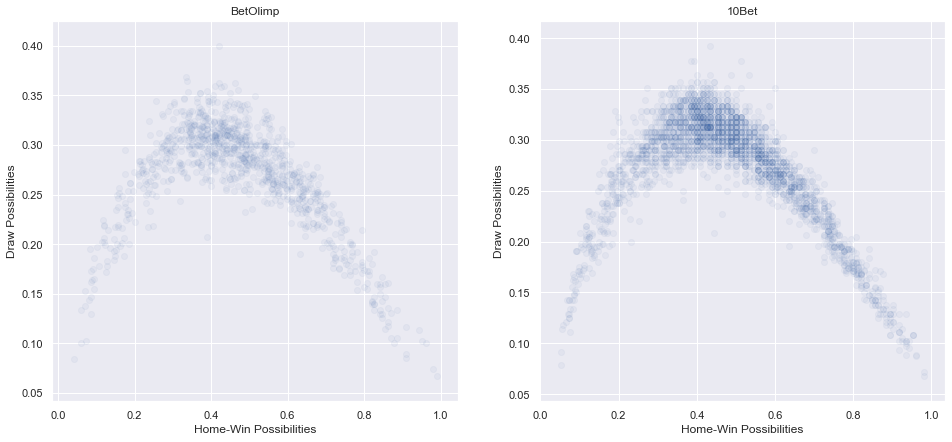

In [807]:


plt.figure(figsize= (16,7))

plt.subplot(1,2,1)
plt.title("BetOlimp")
plt.scatter(makers_1[0]["possibility"], makers[0]["possibility"], alpha = 0.05)
plt.xlabel("Home-Win Possibilities")
plt.ylabel("Draw Possibilities")
plt.subplot(1,2,2)
plt.title("10Bet")
plt.scatter(makers_1[1]["possibility"], makers[1]["possibility"], alpha = 0.05)
plt.xlabel("Home-Win Possibilities")
plt.ylabel("Draw Possibilities")
plt.show()

# Homework 2

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Task 1

Column 1 --> Bag Class

Column 2 --> Bag ID

In [37]:
data = pd.read_csv('Musk1.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26


In [38]:
from sklearn.preprocessing import StandardScaler
x = data.loc[:,2:167]
y = data.loc[:,0]

### Let's separate the independent features and dependent class column:

In [39]:
x.head()

,2,3,4,5,6,7,8,9,10,11,...,158,159,160,161,162,163,164,165,166,167
0,42,-198,-109,-75,-117,11,23,-88,-28,-27,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,42,-191,-142,-65,-117,55,49,-170,-45,5,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,42,-191,-142,-75,-117,11,49,-161,-45,-28,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,42,-198,-110,-65,-117,55,23,-95,-28,5,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,42,-198,-102,-75,-117,10,24,-87,-28,-28,...,-238,-73,-127,51,128,144,43,-30,14,26


In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

#### Than we need to standardize these independent features' values:

In [41]:
x = StandardScaler().fit_transform(x)

In [42]:
x

array([[ 0.1809131 , -0.88252743, -0.43062779, ..., -0.17946317,
         0.55638614, -0.06861517],
       [ 0.1809131 , -0.80318093, -0.90819777, ..., -0.17946317,
         0.53912936, -0.06861517],
       [ 0.1809131 , -0.80318093, -0.90819777, ..., -0.17946317,
         0.53912936, -0.05014186],
       ...,
       [ 0.2362567 ,  0.20565318,  0.85736399, ..., -0.17946317,
         0.12496664, -1.28785397],
       [ 0.01488231,  0.70440263,  1.53753942, ...,  0.38295103,
         0.5046158 ,  0.74421069],
       [ 0.73434907, -0.0097159 ,  0.79947672, ...,  1.25781757,
         0.65992682,  1.15062363]])

#### Than we import PCA library for python, we choose n = 2 as we want to reduce the number of components to 2:

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [44]:
principalComponents = pca.fit_transform(x)

In [45]:
columns = data[1].unique()

In [46]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["principal_component_1", "principal_component_2"])

In [49]:
finalDf = pd.concat([principalDf, data[0]], axis = 1)

In [54]:
finalDf.tail()

,principal_component_1,principal_component_2,0
471,-5.253664,-1.294476,0
472,-6.833537,-0.135816,0
473,10.587193,-2.892693,0
474,-4.003161,-0.307099,0
475,10.507496,-2.668611,0


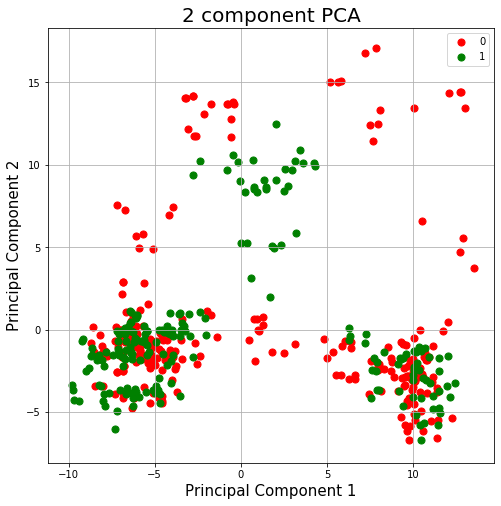

In [53]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

This seem like, it is not a good transformation approach for classifying bags.

## Task 2

### Let's display our 256x256 photo

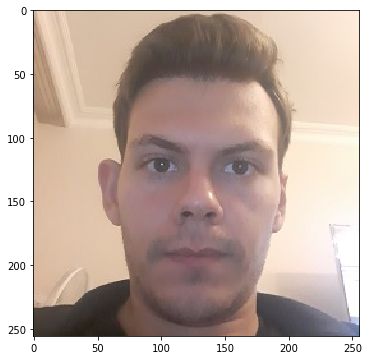

In [88]:
image = cv2.imread('selfie.jpg',1)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (6,6))
plt.imshow(image)

In [89]:
r,g,b = cv2.split(image)

In [90]:
noise_R = np.random.uniform(r.min(),r.max()*0.1, r.size)
noise_G = np.random.uniform(g.min(),g.max()*0.1, g.size)
noise_B = np.random.uniform(b.min(),b.max()*0.1, b.size)

In [91]:
noise_R = noise_R.reshape(256,256)
noise_G = noise_G.reshape(256,256)
noise_B = noise_B.reshape(256,256)

In [92]:
r = r + noise_R
g = g + noise_G
b = b + noise_B

Some pixel values could get bigger than 255, to avoid that, we use clip fuction to limit max of a pixel value: 

In [93]:
r = np.clip(r, a_min = 0, a_max = 255)
g = np.clip(g, a_min = 0, a_max = 255)
b = np.clip(b, a_min = 0, a_max = 255)

In [94]:
img = cv2.merge((r, g, b))

### Noisy Image

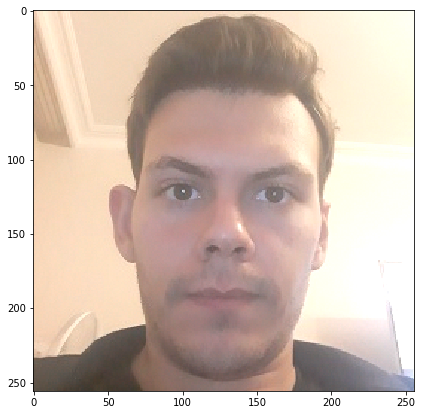

In [95]:
plt.figure(figsize = (7, 7))
img = img.astype(np.uint8)
plt.imshow(img)

### Each channel of the Noisy Image

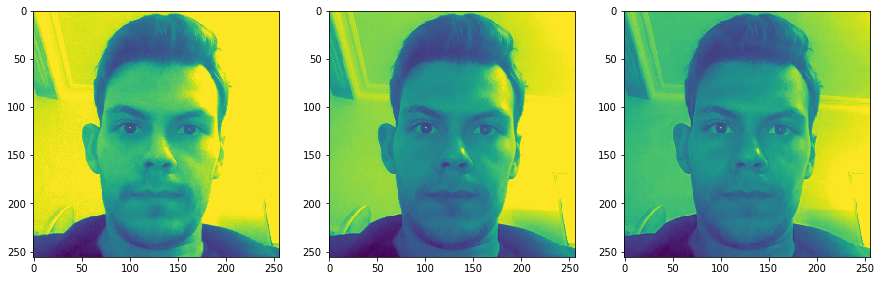

In [96]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))
#fig.suptitle('Channels')
ax1.imshow(r)
ax2.imshow(g)
ax3.imshow(b)

### Now lets transform our noisy image to grayscale format:

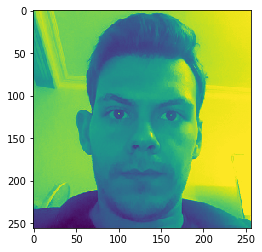

In [97]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [98]:
gray

array([[201, 205, 224, ..., 252, 252, 252],
       [198, 205, 217, ..., 251, 252, 252],
       [193, 205, 208, ..., 252, 252, 253],
       ...,
       [ 80,  78,  79, ..., 158, 156, 158],
       [ 80,  80,  77, ..., 157, 156, 167],
       [ 80,  78,  76, ..., 168, 162, 158]], dtype=uint8)

### Import necessary libraries to implement PCA:

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.io as sio
import matplotlib.image as image
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
gray = normalize(gray)

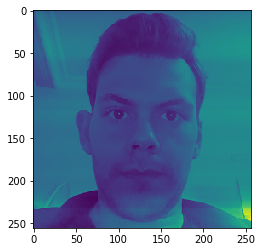

In [101]:
plt.imshow(gray)

In [102]:
pca = PCA(.25)
lower_dimension_data = pca.fit_transform(gray)

In [103]:
lower_dimension_data.shape

(256, 1)

In [104]:
approximation = pca.inverse_transform(lower_dimension_data)
approximation.shape

(256, 256)

In [105]:
approximation = approximation.reshape(1,256,256)
gray = gray.reshape(1,256,256)

In [106]:
gray.shape

(1, 256, 256)

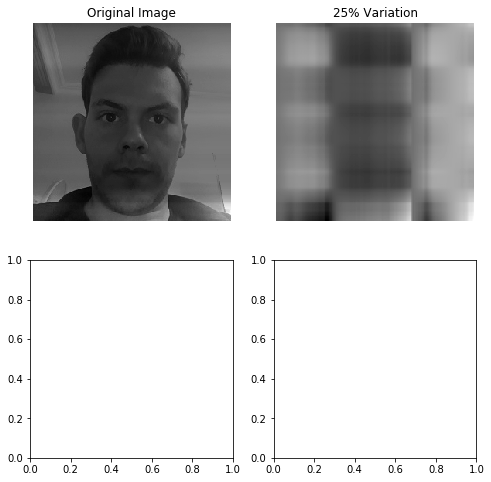

In [116]:
for i in range(0,gray.shape[0]):
    gray[i,] = gray[i,].T
    approximation[i,] = approximation[i,].T
    
fig4, axarr = plt.subplots(2,2,figsize=(8,8))
axarr[0,0].imshow(gray[0,],cmap='gray')
axarr[0,0].set_title('Original Image')
axarr[0,0].axis('off')
axarr[0,1].imshow(approximation[0,],cmap='gray')
axarr[0,1].set_title('25% Variation')
axarr[0,1].axis('off')
plt.show()

## Homework 3

In [2]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("consumption.csv")
data.head()

,Tarih,Saat,Tuketim Miktari (MWh)
0,01.01.2016,00:00,"26.277,24"
1,01.01.2016,01:00,"24.991,82"
2,01.01.2016,02:00,"23.532,61"
3,01.01.2016,03:00,"22.464,78"
4,01.01.2016,04:00,"22.002,91"


In order to see data better, we make date and hour index.

In [ ]:
data.set_index(["Tarih","Saat"], inplace = True)

In [11]:
data.head(10)

Tuketim Miktari (MWh)
Tarih      Saat                       
01.01.2016 00:00             26.277,24
           01:00             24.991,82
           02:00             23.532,61
           03:00             22.464,78
           04:00             22.002,91
           05:00             21.957,08
           06:00             22.203,54
           07:00             21.844,16
           08:00             23.094,73
           09:00             25.202,27

We change the column name of the consumption in order to get the data easier

In [14]:
data.rename(columns={'Tuketim Miktari (MWh)':'tuketim'},inplace=True)
data.head()

tuketim
Tarih      Saat            
01.01.2016 00:00  26.277,24
           01:00  24.991,82
           02:00  23.532,61
           03:00  22.464,78
           04:00  22.002,91

We turn column 'tuketim' into float values.

In [28]:
data['tuketim']  = [float(i.replace(".","").replace(",",".")) for i in data["tuketim"]]

In [32]:
type(data['tuketim'][0])

numpy.float64

## PART a)

In [159]:
# Last weeks fridays consumption lag168 data
lag168 = data[-192:-168]
lag168.head()

tuketim
Tarih      Saat           
25.10.2019 00:00  29563.43
           01:00  28242.90
           02:00  27258.74
           03:00  26739.84
           04:00  26555.35

In [160]:
# Consumption of lag48
lag48 = data[-72:-48]
lag48.head()

tuketim
Tarih      Saat           
30.10.2019 00:00  27154.21
           01:00  26157.42
           02:00  25373.88
           03:00  24911.43
           04:00  24836.11

In [161]:
# The data we are going to test: (1th November 2019)
test = data[-24:]
test.head()

tuketim
Tarih      Saat           
01.11.2019 00:00  29417.56
           01:00  28133.75
           02:00  27358.60
           03:00  26780.09
           04:00  26511.54

**MAPE for lag168**

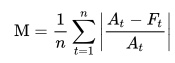

In [91]:
toplam = float(0)
print("Actual Values || Forecast Values\n")

for i in range(len(lag168['tuketim'])):
    print(test['tuketim'][i] , '||' , lag168['tuketim'][i])
    toplam += abs(test['tuketim'][i] - lag168['tuketim'][i]) / test['tuketim'][i]


print("\n"+ "Sum:     " + str(toplam))
print("MAPE Error for lag168:   " + str(toplam/len(lag168['tuketim'])))

Actual Values || Forecast Values

29417.56 || 29563.43
28133.75 || 28242.9
27358.6 || 27258.74
26780.09 || 26739.84
26511.54 || 26555.35
27002.74 || 26857.36
27945.43 || 27783.77
29120.27 || 28969.45
32815.46 || 32153.21
34569.09 || 33615.22
35091.43 || 33398.5
35416.33 || 33542.88
33184.81 || 30839.72
33549.94 || 30920.91
35732.88 || 33019.99
35859.75 || 33476.62
36268.51 || 34304.06
37011.89 || 35973.89
37199.91 || 36302.11
36056.96 || 35698.7
35130.19 || 34820.93
33947.64 || 33659.48
32877.69 || 32696.81
31590.75 || 30942.64

Sum:     0.631903428588055
MAPE Error for lag168:   0.026329309524502294


In [93]:
toplam = float(0)
print("Actual Values || Forecast Values\n")

for i in range(len(lag48['tuketim'])):
    print(test['tuketim'][i] , '||' , lag48['tuketim'][i])
    toplam += abs(test['tuketim'][i] - lag48['tuketim'][i]) / test['tuketim'][i]


print("\n"+ "Sum:     " + str(toplam))
print("MAPE Error for lag48:   " + str(toplam/len(lag48['tuketim'])))

Actual Values || Forecast Values

29417.56 || 27154.21
28133.75 || 26157.42
27358.6 || 25373.88
26780.09 || 24911.43
26511.54 || 24836.11
27002.74 || 25233.76
27945.43 || 26296.0
29120.27 || 27575.6
32815.46 || 31667.27
34569.09 || 33138.17
35091.43 || 32926.25
35416.33 || 33122.35
33184.81 || 31518.65
33549.94 || 31895.21
35732.88 || 33050.83
35859.75 || 33464.69
36268.51 || 34612.24
37011.89 || 36082.1
37199.91 || 36936.24
36056.96 || 36219.71
35130.19 || 35136.55
33947.64 || 34155.15
32877.69 || 32878.23
31590.75 || 31456.46

Sum:     1.0674682056215312
MAPE Error for lag48:   0.04447784190089713


## Part b)

We already have the test dataset as follows:

In [95]:
test

tuketim
Tarih      Saat           
01.11.2019 00:00  29417.56
           01:00  28133.75
           02:00  27358.60
           03:00  26780.09
           04:00  26511.54
           05:00  27002.74
           06:00  27945.43
           07:00  29120.27
           08:00  32815.46
           09:00  34569.09
           10:00  35091.43
           11:00  35416.33
           12:00  33184.81
           13:00  33549.94
           14:00  35732.88
           15:00  35859.75
           16:00  36268.51
           17:00  37011.89
           18:00  37199.91
           19:00  36056.96
           20:00  35130.19
           21:00  33947.64
           22:00  32877.69
           23:00  31590.75

**Let's start over to reset indexing:**

In [1013]:
cons = pd.read_csv('consumption.csv')
cons.head()

,Tarih,Saat,Tuketim Miktari (MWh)
0,01.01.2016,00:00,"26.277,24"
1,01.01.2016,01:00,"24.991,82"
2,01.01.2016,02:00,"23.532,61"
3,01.01.2016,03:00,"22.464,78"
4,01.01.2016,04:00,"22.002,91"


### Year - Month - Day

Let's change date column to datetime format properly, so that we can filter columns by date without any problem:

In [1014]:
cons.rename(columns={'Tuketim Miktari (MWh)':'tuketim'},inplace=True)
cons.rename(columns={'Tarih':'tarih'},inplace=True)
cons['tarih'] = pd.to_datetime(cons['tarih'], format='%d.%m.%Y')
cons['tuketim']  = [float(i.replace(".","").replace(",",".")) for i in cons["tuketim"]]

Since our dataset starts from the date **2016-01-01**, we wont be able to find lag168 for the first week, so I would like to shift the start of our training data for 1 week, such that it starts from **2016-01-09:**

In [ ]:
train = cons[cons['tarih'] > '2016-01-08']

In [422]:
train.head()

,tarih,Saat,tuketim
192,2016-01-09,00:00,29906.93
193,2016-01-09,01:00,28061.98
194,2016-01-09,02:00,26808.78
195,2016-01-09,03:00,25798.80
196,2016-01-09,04:00,25820.46


In [482]:
cons.head()

,tarih,Saat,tuketim
0,2016-01-01,00:00,26277.24
1,2016-01-01,01:00,24991.82
2,2016-01-01,02:00,23532.61
3,2016-01-01,03:00,22464.78
4,2016-01-01,04:00,22002.91


In [325]:
from datetime import datetime, timedelta

We add another column to indicate the lag dates: lag48 dates first, it will be obviously 2 days earlier than the main date.

In [472]:
lag48_dates = train['tarih'] - timedelta(days=2)

In [473]:
train['lag48_dates'] = lag48_dates

c:\users\gunay.eser\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [477]:
train.head()

,tarih,Saat,tuketim,lag48_dates
192,2016-01-09,00:00,29906.93,2016-01-07
193,2016-01-09,01:00,28061.98,2016-01-07
194,2016-01-09,02:00,26808.78,2016-01-07
195,2016-01-09,03:00,25798.80,2016-01-07
196,2016-01-09,04:00,25820.46,2016-01-07


**Refresh the index:**

Refreshing index is very important to avoid any problems when creating new columns or concating, merging etc.

In [545]:
train = train.reset_index(drop=True)

**Get lage48_dates into a python list:**

So that, looping into that list, we will extract the consumption of those dates, and add that data as another columns.

In [492]:
dates = list()
for i in train.lag48_dates.unique():
    dates.append(str(i).split('T')[0])

Here we extract the data with the matching date:

In [498]:
lcons = pd.DataFrame()
for i in dates:
    lcons = pd.concat([lcons, cons[cons['tarih'] == i ]])

Rename the columns and reseting index:

In [506]:
lcons.rename({'tarih': 'lag48_dates', 'tuketim': 'lag48'}, axis=1, inplace=True)

In [539]:
lcons = lcons.reset_index(drop=True) 

And add as a column to or training dataset:

In [546]:
train['lag48'] = pd.Series(lcons['lag48'])

**Looks like we added the lag48 values as a column to our train dataset:**

In [550]:
train.head()

,tarih,Saat,tuketim,lag48_dates,lag48
0,2016-01-09,00:00,29906.93,2016-01-07,28763.95
1,2016-01-09,01:00,28061.98,2016-01-07,27284.84
2,2016-01-09,02:00,26808.78,2016-01-07,26321.95
3,2016-01-09,03:00,25798.80,2016-01-07,25748.49
4,2016-01-09,04:00,25820.46,2016-01-07,25636.58


In [551]:
train.tail()

,tarih,Saat,tuketim,lag48_dates,lag48
33403,2019-11-01,19:00,36056.96,2019-10-30,NaN
33404,2019-11-01,20:00,35130.19,2019-10-30,NaN
33405,2019-11-01,21:00,33947.64,2019-10-30,NaN
33406,2019-11-01,22:00,32877.69,2019-10-30,NaN
33407,2019-11-01,23:00,31590.75,2019-10-30,NaN


**Now, let's add lag168 data to the train dataset:**

Same procedure as we did in lag48:

In [567]:
lag168_dates = train['tarih'] - timedelta(days=7)

In [568]:
train['lag168_dates'] = lag168_dates

In [569]:
dates = list()
for i in train.lag168_dates.unique():
    dates.append(str(i).split('T')[0])

In [570]:
lcons2 = pd.DataFrame()
for i in dates:
    lcons2 = pd.concat([lcons2, cons[cons['tarih'] == i ]])

In [571]:
lcons2.rename({'tarih': 'lag168_dates', 'tuketim': 'lag168'}, axis=1, inplace=True)

In [572]:
lcons2 = lcons2.reset_index(drop=True) 

In [573]:
lcons2.head()

,lag168_dates,Saat,lag168
0,2016-01-02,00:00,26224.60
1,2016-01-02,01:00,24708.58
2,2016-01-02,02:00,23771.58
3,2016-01-02,03:00,22921.29
4,2016-01-02,04:00,22870.89


In [575]:
train['lag168'] = pd.Series(lcons2['lag168'])

### Know we have our long format of the training dataset with both lag48 and lag168 datas in it:

In [578]:
train

,tarih,Saat,tuketim,lag48_dates,lag48,lag168_dates,lag168
0,2016-01-09,00:00,29906.93,2016-01-07,28763.95,2016-01-02,26224.60
1,2016-01-09,01:00,28061.98,2016-01-07,27284.84,2016-01-02,24708.58
2,2016-01-09,02:00,26808.78,2016-01-07,26321.95,2016-01-02,23771.58
3,2016-01-09,03:00,25798.80,2016-01-07,25748.49,2016-01-02,22921.29
4,2016-01-09,04:00,25820.46,2016-01-07,25636.58,2016-01-02,22870.89
5,2016-01-09,05:00,26035.77,2016-01-07,25932.52,2016-01-02,23325.63
6,2016-01-09,06:00,26451.24,2016-01-07,26963.74,2016-01-02,23604.98
7,2016-01-09,07:00,26853.42,2016-01-07,28444.83,2016-01-02,24022.70
8,2016-01-09,08:00,30627.32,2016-01-07,32804.27,2016-01-02,26930.48
9,2016-01-09,09:00,33468.25,2016-01-07,35608.30,2016-01-02,30043.60


**As we can see, last 24 rows of the train data is going to be our test dataset:**

So we assign it into a new dataframe named test:

In [610]:
test = train[-24:].copy()

In [611]:
test.head()

,tarih,Saat,tuketim,lag48_dates,lag48,lag168_dates,lag168
33384,2019-11-01,00:00,29417.56,2019-10-30,NaN,2019-10-25,NaN
33385,2019-11-01,01:00,28133.75,2019-10-30,NaN,2019-10-25,NaN
33386,2019-11-01,02:00,27358.60,2019-10-30,NaN,2019-10-25,NaN
33387,2019-11-01,03:00,26780.09,2019-10-30,NaN,2019-10-25,NaN
33388,2019-11-01,04:00,26511.54,2019-10-30,NaN,2019-10-25,NaN


Reset indexes again:

In [612]:
test = test.reset_index(drop=True)
test.head()

,tarih,Saat,tuketim,lag48_dates,lag48,lag168_dates,lag168
0,2019-11-01,00:00,29417.56,2019-10-30,NaN,2019-10-25,NaN
1,2019-11-01,01:00,28133.75,2019-10-30,NaN,2019-10-25,NaN
2,2019-11-01,02:00,27358.60,2019-10-30,NaN,2019-10-25,NaN
3,2019-11-01,03:00,26780.09,2019-10-30,NaN,2019-10-25,NaN
4,2019-11-01,04:00,26511.54,2019-10-30,NaN,2019-10-25,NaN


Fill the lag48 and lag168 data as we did with training dataset:

In [613]:
dates = list()
for i in test.lag48_dates.unique():
    dates.append(str(i).split('T')[0])

In [614]:
lcons3 = pd.DataFrame()
for i in dates:
    lcons3 = pd.concat([lcons3, cons[cons['tarih'] == i ]])

In [615]:
lcons3.rename({'tarih': 'lag48_dates', 'tuketim': 'lag48'}, axis=1, inplace=True)

In [616]:
lcons3 = lcons3.reset_index(drop=True) 

In [617]:
lcons3.head()

,lag48_dates,Saat,lag48
0,2019-10-30,00:00,27154.21
1,2019-10-30,01:00,26157.42
2,2019-10-30,02:00,25373.88
3,2019-10-30,03:00,24911.43
4,2019-10-30,04:00,24836.11


In [618]:
test['lag48'] = pd.Series(lcons3['lag48'])

lag48 is done.

In [619]:
test.head()

,tarih,Saat,tuketim,lag48_dates,lag48,lag168_dates,lag168
0,2019-11-01,00:00,29417.56,2019-10-30,27154.21,2019-10-25,NaN
1,2019-11-01,01:00,28133.75,2019-10-30,26157.42,2019-10-25,NaN
2,2019-11-01,02:00,27358.60,2019-10-30,25373.88,2019-10-25,NaN
3,2019-11-01,03:00,26780.09,2019-10-30,24911.43,2019-10-25,NaN
4,2019-11-01,04:00,26511.54,2019-10-30,24836.11,2019-10-25,NaN


In [626]:
dates = list()
for i in train.lag168_dates.unique():
    dates.append(str(i).split('T')[0])

In [627]:
lcons4 = pd.DataFrame()
for i in dates:
    lcons4 = pd.concat([lcons4, cons[cons['tarih'] == i ]])

In [628]:
lcons4.rename({'tarih': 'lag168_dates', 'tuketim': 'lag168'}, axis=1, inplace=True)

In [629]:
lcons4 = lcons4.reset_index(drop=True) 

In [630]:
lcons4.head()

,lag168_dates,Saat,lag168
0,2016-01-02,00:00,26224.60
1,2016-01-02,01:00,24708.58
2,2016-01-02,02:00,23771.58
3,2016-01-02,03:00,22921.29
4,2016-01-02,04:00,22870.89


In [631]:
test['lag168'] = pd.Series(lcons4['lag168'])

lag168 is also done.

### And now our TEST data is ready as well:

In [646]:
test

,tarih,Saat,tuketim,lag48_dates,lag48,lag168_dates,lag168
0,2019-11-01,00:00,29417.56,2019-10-30,27154.21,2019-10-25,26224.60
1,2019-11-01,01:00,28133.75,2019-10-30,26157.42,2019-10-25,24708.58
2,2019-11-01,02:00,27358.60,2019-10-30,25373.88,2019-10-25,23771.58
3,2019-11-01,03:00,26780.09,2019-10-30,24911.43,2019-10-25,22921.29
4,2019-11-01,04:00,26511.54,2019-10-30,24836.11,2019-10-25,22870.89
5,2019-11-01,05:00,27002.74,2019-10-30,25233.76,2019-10-25,23325.63
6,2019-11-01,06:00,27945.43,2019-10-30,26296.00,2019-10-25,23604.98
7,2019-11-01,07:00,29120.27,2019-10-30,27575.60,2019-10-25,24022.70
8,2019-11-01,08:00,32815.46,2019-10-30,31667.27,2019-10-25,26930.48
9,2019-11-01,09:00,34569.09,2019-10-30,33138.17,2019-10-25,30043.60


### Now let's get into the entertaining part:

"fit the model already for god's sake!"

In [596]:
from sklearn import linear_model

Multiple linear regression with 2 independent variables:

In [633]:
x = train[['lag48', 'lag168']][:33383]  ##  Not to include last 24 hour  [:33383]
y = train[['tuketim']][:33383]          ##          //

regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Coefficients and the Intrcept values of the model:**

In [634]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [1981.35617999]
Coefficients: 
 [[0.63652781 0.30275782]]


**Prediction Results for the 1th of November 2019:**

In [636]:
predictions = regr.predict(test[['lag48','lag168']])

In [637]:
predictions

array([[27205.46877355],
       [26111.99730375],
       [25329.5682242 ],
       [24777.77398935],
       [24714.57172054],
       [25105.36309617],
       [25866.08379284],
       [26807.0527739 ],
       [30291.86765452],
       [32170.65784391],
       [32659.0766237 ],
       [33186.41928133],
       [32007.79803752],
       [32240.52551887],
       [32948.42863625],
       [33150.81697474],
       [34112.54721744],
       [35359.83710559],
       [35662.31683656],
       [34920.89751041],
       [34004.03464856],
       [33122.44716164],
       [32266.4273388 ],
       [30972.28445608]])

### Let's calculate the MAPE Error for our prediction:

In [644]:
toplam = float(0)
print("Actual Values || Predicted Values\n")

for i in range(len(test['tuketim'])):
    print(test['tuketim'][i] , '||' , predictions[i][0])
    toplam += abs(test['tuketim'][i] - predictions[i][0]) / test['tuketim'][i]


print("\n"+ "Sum:     " + str(toplam))
print("\nMAPE Error for the prediction:   " + str(toplam/len(test['tuketim'])))

Actual Values || Predicted Values

29417.56 || 27205.468773553213
28133.75 || 26111.99730375492
27358.6 || 25329.568224195333
26780.09 || 24777.773989351866
26511.54 || 24714.571720542182
27002.74 || 25105.363096174045
27945.43 || 25866.08379283508
29120.27 || 26807.052773896845
32815.46 || 30291.867654516456
34569.09 || 32170.657843908473
35091.43 || 32659.07662369569
35416.33 || 33186.41928133464
33184.81 || 32007.7980375216
33549.94 || 32240.525518868722
35732.88 || 32948.42863625252
35859.75 || 33150.816974735935
36268.51 || 34112.54721743508
37011.89 || 35359.83710559109
37199.91 || 35662.31683655893
36056.96 || 34920.897510414674
35130.19 || 34004.03464856174
33947.64 || 33122.44716164024
32877.69 || 32266.427338801117
31590.75 || 30972.284456082925

Sum:     1.365861760983099

MAPE Error for the prediction:   0.056910906707629126


## PART C )

c) As mentioned earlier, hourly seasonality is important. Although we used the same hour’s
consumption value of the past days to handle this problem for part (b), we implicitly impose an
assumption that prediction model for each hour has the same coefficients which may not be correct
since the consumption behavior at nights can be different than the other hours. Therefore, modeling
each hour separately is another way to approach to the same problem. Train linear regression models
for each hour using the same training period (24 models) and report your test performance as in part
(a).

**We already have our dataset in long format from Part B:**

In [1070]:
train.head(10)

,tarih,Saat,tuketim,lag48_dates,lag48,lag168_dates,lag168
0,2016-01-09,00:00,29906.93,2016-01-07,28763.95,2016-01-02,26224.60
1,2016-01-09,01:00,28061.98,2016-01-07,27284.84,2016-01-02,24708.58
2,2016-01-09,02:00,26808.78,2016-01-07,26321.95,2016-01-02,23771.58
3,2016-01-09,03:00,25798.80,2016-01-07,25748.49,2016-01-02,22921.29
4,2016-01-09,04:00,25820.46,2016-01-07,25636.58,2016-01-02,22870.89
5,2016-01-09,05:00,26035.77,2016-01-07,25932.52,2016-01-02,23325.63
6,2016-01-09,06:00,26451.24,2016-01-07,26963.74,2016-01-02,23604.98
7,2016-01-09,07:00,26853.42,2016-01-07,28444.83,2016-01-02,24022.70
8,2016-01-09,08:00,30627.32,2016-01-07,32804.27,2016-01-02,26930.48
9,2016-01-09,09:00,33468.25,2016-01-07,35608.30,2016-01-02,30043.60


Since its last 24 rows includes our test data, we cut the last 24 rows and assingn it into data_c:

In [1071]:
data_c = train[:-24].copy()

We extract hours that we have into a list:

In [1072]:
hours = data_c['Saat'].unique()

In [1073]:
hours

array(['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
       '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00'], dtype=object)

We create 24 new dataframes each of which shows the consumption a particular hour from each day:

In [1074]:
hourly = pd.DataFrame()
columns = list()
for i in hours:
    columns.append(data_c[data_c['Saat'] == i].reset_index(drop=True))

Columns is the list that contains these 24 dataframes: 

In [781]:
columns

[          tarih   Saat   tuketim lag48_dates     lag48 lag168_dates    lag168
 0    2016-01-09  00:00  29906.93  2016-01-07  28763.95   2016-01-02  26224.60
 1    2016-01-10  00:00  28890.37  2016-01-08  28602.02   2016-01-03  27613.96
 2    2016-01-11  00:00  27130.75  2016-01-09  29906.93   2016-01-04  27103.09
 3    2016-01-12  00:00  29161.64  2016-01-10  28890.37   2016-01-05  29244.38
 4    2016-01-13  00:00  28823.02  2016-01-11  27130.75   2016-01-06  29189.27
 ...         ...    ...       ...         ...       ...          ...       ...
 1386 2019-10-27  00:00  27919.18  2019-10-25  29480.57   2019-10-20  26449.87
 1387 2019-10-28  00:00  26173.13  2019-10-26  27919.18   2019-10-21  29195.12
 1388 2019-10-29  00:00  26438.40  2019-10-27  26173.13   2019-10-22  29265.74
 1389 2019-10-30  00:00  27154.21  2019-10-28  26438.40   2019-10-23  29351.46
 1390 2019-10-31  00:00  29331.55  2019-10-29  27154.21   2019-10-24  29563.43
 
 [1391 rows x 7 columns],
           tarih   Saat 

In [782]:
from tqdm import tqdm_notebook as tqdm

We already have our dataset for 1th of November 2019:

In [788]:
test

,tarih,Saat,tuketim,lag48_dates,lag48,lag168_dates,lag168
0,2019-11-01,00:00,29417.56,2019-10-30,27154.21,2019-10-25,26224.60
1,2019-11-01,01:00,28133.75,2019-10-30,26157.42,2019-10-25,24708.58
2,2019-11-01,02:00,27358.60,2019-10-30,25373.88,2019-10-25,23771.58
3,2019-11-01,03:00,26780.09,2019-10-30,24911.43,2019-10-25,22921.29
4,2019-11-01,04:00,26511.54,2019-10-30,24836.11,2019-10-25,22870.89
5,2019-11-01,05:00,27002.74,2019-10-30,25233.76,2019-10-25,23325.63
6,2019-11-01,06:00,27945.43,2019-10-30,26296.00,2019-10-25,23604.98
7,2019-11-01,07:00,29120.27,2019-10-30,27575.60,2019-10-25,24022.70
8,2019-11-01,08:00,32815.46,2019-10-30,31667.27,2019-10-25,26930.48
9,2019-11-01,09:00,34569.09,2019-10-30,33138.17,2019-10-25,30043.60


In order to compare real consumption data with predicted values, we assign real one into a list:

In [1075]:
reals = test['tuketim'].tolist()

Then we fit the data and predict the related date as for each 24 models:

In [1076]:
predictions_c = list()
for i in columns:
    x = i[['lag48', 'lag168']]  
    y = i[['tuketim']] 
    
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    
    #print('Intercept: \n', regr.intercept_)
    #print('Coefficients: \n', regr.coef_)
    
    testy = test[test['Saat'] == i['Saat'][0]].copy()
    predictions_c.append(regr.predict(testy[['lag48','lag168']])[0][0])

**Predictions for each our is as follows:**

In [1077]:
predictions_c

[27131.882747493073,
 26003.03131343478,
 25168.87351906743,
 24607.047880674647,
 24497.438334975443,
 24840.82958416891,
 25558.26261832166,
 26437.508777021958,
 30331.303697918505,
 32662.597442272683,
 33314.048066655785,
 33859.181936303445,
 32451.47967951112,
 32755.79194353647,
 33433.089348553316,
 33538.87281329631,
 34393.52347185702,
 35538.85426515796,
 35939.279840554635,
 35353.91362085033,
 34425.56863897054,
 33516.24444571828,
 32546.608712236484,
 31141.421373624577]

**Let us calculate the MAPE error for each hour:**

In [1102]:
error_c = list()
for i in range(len(predictions_c)):
    print(f"Model number  {i}\n")
    print(f"Real Value  ||  Predicted Value\n")
    print(reals[i] , '||' , predictions_c[i])
    print("\n")
    print("Error Rate:\n")
    hata_c = (abs(reals[i] - predictions_c[i]) / reals[i])
    error_c.append(hata_c*100)
    print(abs(reals[i] - predictions_c[i]) / reals[i])
    print("\n")
    print("-------------------------------------------------------")

Model number  0

Real Value  ||  Predicted Value

29417.56 || 27131.882747493073


Error Rate:

0.07769771702707254


-------------------------------------------------------
Model number  1

Real Value  ||  Predicted Value

28133.75 || 26003.03131343478


Error Rate:

0.07573532453246433


-------------------------------------------------------
Model number  2

Real Value  ||  Predicted Value

27358.6 || 25168.87351906743


Error Rate:

0.08003795811673727


-------------------------------------------------------
Model number  3

Real Value  ||  Predicted Value

26780.09 || 24607.047880674647


Error Rate:

0.08114394385251705


-------------------------------------------------------
Model number  4

Real Value  ||  Predicted Value

26511.54 || 24497.438334975443


Error Rate:

0.07597075330307324


-------------------------------------------------------
Model number  5

Real Value  ||  Predicted Value

27002.74 || 24840.82958416891


Error Rate:

0.08006263126745992


----------------

In [1080]:
statistics.mean(error_c)*100

5.210239438556407

## PART D )

In [1023]:
test_d = pd.pivot_table(data_c, values=['lag48','lag168'], columns=['Saat'],index=['tarih'])

In [1012]:
data_c.head()

,tarih,Saat,tuketim,lag48_dates,lag48,lag168_dates,lag168
0,2016-01-09,00:00,29906.93,2016-01-07,28763.95,2016-01-02,26224.60
1,2016-01-09,01:00,28061.98,2016-01-07,27284.84,2016-01-02,24708.58
2,2016-01-09,02:00,26808.78,2016-01-07,26321.95,2016-01-02,23771.58
3,2016-01-09,03:00,25798.80,2016-01-07,25748.49,2016-01-02,22921.29
4,2016-01-09,04:00,25820.46,2016-01-07,25636.58,2016-01-02,22870.89


Let's create out wide format, in pandas this is called Pivot_Table:

In [964]:
wide = pd.pivot_table(data_c, values=['lag48','lag168'], columns='Saat', index=['tarih'])

In [970]:
for i in hours:
    wide[f'consumption_{i}'] = cons[cons['Saat'] == i].tuketim.values

In [971]:
wide

lag168                                                    \
Saat           00:00     01:00     02:00     03:00     04:00     05:00   
tarih                                                                    
2016-01-09  26224.60  24708.58  23771.58  22921.29  22870.89  23325.63   
2016-01-10  27613.96  25779.28  24566.31  23878.42  23511.38  23672.32   
2016-01-11  27103.09  25439.84  24395.07  23961.03  23860.63  24418.47   
2016-01-12  29244.38  27637.23  26335.78  25870.23  25975.07  26318.48   
2016-01-13  29189.27  27614.02  26578.97  25719.19  25864.63  25918.59   
...              ...       ...       ...       ...       ...       ...   
2019-10-27  26449.87  25268.02  24421.16  23988.47  23923.00  24337.52   
2019-10-28  29195.12  27677.44  26826.76  26426.05  26253.14  26589.28   
2019-10-29  29265.74  27902.58  27211.54  26519.88  26459.65  26724.68   
2019-10-30  29351.46  28195.00  27269.71  26541.81  26287.62  26677.16   
2019-10-31  29563.43  28242.90  27258.74  26739.84  26555.35  26857.36   

                                                    ... consumption_14:00  \
Saat           06:00     07:00     08:00     09:00  ...                     
tarih                                               ...                     
2016-01-09  23604.98  24022.70  26930.48  30043.60  ...          33524.80   
2016-01-10  23827.08  23405.11  24638.72  26802.38  ...          29089.83   
2016-01-11  25708.59  27455.39  32982.07  37175.84  ...          36383.06   
2016-01-12  27109.29  28570.22  33106.00  36657.12  ...          34934.00   
2016-01-13  27091.94  28533.05  33203.34  36257.22  ...          36201.35   
...              ...       ...       ...       ...  ...               ...   
2019-10-27  25397.17  26946.56  31180.84  33057.72  ...          26125.23   
2019-10-28  27333.48  28568.17  32397.66  34074.71  ...          30560.42   
2019-10-29  27599.95  28582.21  32034.03  33353.43  ...          28503.34   
2019-10-30  27377.08  28670.73  32155.51  33302.87  ...          33050.83   
2019-10-31  27783.77  28969.45  32153.21  33615.22  ...          33610.56   

           consumption_15:00 consumption_16:00 consumption_17:00  \
Saat                                                               
tarih                                                              
2016-01-09          32951.39          33655.89          35045.14   
2016-01-10          29447.75          30569.07          32006.15   
2016-01-11          36013.19          36848.54          37368.40   
2016-01-12          34785.11          35690.28          36566.50   
2016-01-13          36012.25          36785.82          37173.82   
...                      ...               ...               ...   
2019-10-27          26816.28          27786.59          29270.44   
2019-10-28          30784.13          31417.36          32603.58   
2019-10-29          28726.63          29654.71          31123.37   
2019-10-30          33464.69          34612.24          36082.10   
2019-10-31          34049.16          35164.62          36513.48   

           consumption_18:00 consumption_19:00 consumption_20:00  \
Saat                                                               
tarih                                                              
2016-01-09          34407.27          33494.32          32624.31   
2016-01-10          31706.26          31305.87          30870.26   
2016-01-11          35697.30          34482.37          33526.95   
2016-01-12          35055.97          33912.94          33131.98   
2016-01-13          35574.06          34298.68          33580.53   
...                      ...               ...               ...   
2019-10-27          31545.76          31537.16          30808.01   
2019-10-28          33251.44          32818.51          31861.80   
2019-10-29          32634.84          32073.46          31545.44   
2019-10-30          36936.24          36219.71          35136.55   
2019-10-31          37199.82          36104.42          35263

In [961]:
cons[cons['Saat'] == '00:00']['tuketim'].values

array([29906.93, 28890.37, 27130.75, ..., 26438.4 , 27154.21, 29331.55])

In [1026]:
 cons = cons.iloc[:-24,:].copy()

In [886]:
from sklearn.linear_model import LassoCV
from tqdm import tqdm

In [938]:
test.head()

,tarih,Saat,tuketim,lag48_dates,lag48,lag168_dates,lag168
0,2019-11-01,00:00,29417.56,2019-10-30,27154.21,2019-10-25,26224.60
1,2019-11-01,01:00,28133.75,2019-10-30,26157.42,2019-10-25,24708.58
2,2019-11-01,02:00,27358.60,2019-10-30,25373.88,2019-10-25,23771.58
3,2019-11-01,03:00,26780.09,2019-10-30,24911.43,2019-10-25,22921.29
4,2019-11-01,04:00,26511.54,2019-10-30,24836.11,2019-10-25,22870.89


In [947]:
reals = test.tuketim.tolist()

In [953]:
hours

array(['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
       '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00'], dtype=object)

In [991]:
X = pd.merge(wide['lag48'],wide['lag168'], on = 'tarih')

In [1010]:
X.tail()

Saat,00:00_x,01:00_x,02:00_x,03:00_x,04:00_x,05:00_x,06:00_x,07:00_x,08:00_x,09:00_x,...,14:00_y,15:00_y,16:00_y,17:00_y,18:00_y,19:00_y,20:00_y,21:00_y,22:00_y,23:00_y
tarih,,,,,,,,,,,,,,,,,,,,,
2019-10-27,29480.57,27978.33,27276.31,26707.26,26456.04,26579.56,26858.98,26828.60,29610.06,31036.93,...,34034.85,34324.30,34138.07,34872.54,37169.89,35396.81,34587.96,33460.70,32453.14,30849.86
2019-10-28,27919.18,26739.96,25627.61,24943.13,24630.76,24679.05,24631.80,23696.06,23923.17,24575.39,...,34299.05,34490.13,35018.02,35681.22,36374.13,35747.25,34627.06,33788.69,32574.66,31094.45
2019-10-29,26173.13,24829.47,23936.41,23606.00,23465.03,23681.83,24500.09,25661.66,28924.37,30341.57,...,33463.46,33754.24,34625.56,35748.76,36481.78,35897.97,34870.08,33660.73,32676.78,31187.68
2019-10-30,26438.40,25164.63,24281.70,23721.12,23591.77,23689.71,24118.11,24186.66,26266.15,27340.94,...,33343.10,33844.99,34733.78,35940.96,36896.34,36101.45,35323.94,34256.95,33052.27,31544.26
2019-10-31,27154.21,26157.42,25373.88,24911.43,24836.11,25233.76,26296.00,27575.60,31667.27,33138.17,...,33019.99,33476.62,34304.06,35973.89,36302.11,35698.70,34820.93,33659.48,32696.81,30942.64


In [995]:
from sklearn.linear_model import  Lasso

In [1034]:
train_d = train.iloc[:-24,:].copy()

In [1037]:
test_d

lag168                                                    \
Saat           00:00     01:00     02:00     03:00     04:00     05:00   
tarih                                                                    
2016-01-09  26224.60  24708.58  23771.58  22921.29  22870.89  23325.63   
2016-01-10  27613.96  25779.28  24566.31  23878.42  23511.38  23672.32   
2016-01-11  27103.09  25439.84  24395.07  23961.03  23860.63  24418.47   
2016-01-12  29244.38  27637.23  26335.78  25870.23  25975.07  26318.48   
2016-01-13  29189.27  27614.02  26578.97  25719.19  25864.63  25918.59   
...              ...       ...       ...       ...       ...       ...   
2019-10-27  26449.87  25268.02  24421.16  23988.47  23923.00  24337.52   
2019-10-28  29195.12  27677.44  26826.76  26426.05  26253.14  26589.28   
2019-10-29  29265.74  27902.58  27211.54  26519.88  26459.65  26724.68   
2019-10-30  29351.46  28195.00  27269.71  26541.81  26287.62  26677.16   
2019-10-31  29563.43  28242.90  27258.74  26739.84  26555.35  26857.36   

                                                    ...     lag48            \
Saat           06:00     07:00     08:00     09:00  ...     14:00     15:00   
tarih                                               ...                       
2016-01-09  23604.98  24022.70  26930.48  30043.60  ...  37376.83  37100.43   
2016-01-10  23827.08  23405.11  24638.72  26802.38  ...  36555.58  36190.41   
2016-01-11  25708.59  27455.39  32982.07  37175.84  ...  33524.80  32951.39   
2016-01-12  27109.29  28570.22  33106.00  36657.12  ...  29089.83  29447.75   
2016-01-13  27091.94  28533.05  33203.34  36257.22  ...  36383.06  36013.19   
...              ...       ...       ...       ...  ...       ...       ...   
2019-10-27  25397.17  26946.56  31180.84  33057.72  ...  31208.99  31179.67   
2019-10-28  27333.48  28568.17  32397.66  34074.71  ...  26125.23  26816.28   
2019-10-29  27599.95  28582.21  32034.03  33353.43  ...  30560.42  30784.13   
2019-10-30  27377.08  28670.73  32155.51  33302.87  ...  28503.34  28726.63   
2019-10-31  27783.77  28969.45  32153.21  33615.22  ...  33050.83  33464.69   

                                                                        \
Saat           16:00     17:00     18:00     19:00     20:00     21:00   
tarih                                                                    
2016-01-09  37668.65  37906.99  35841.62  34621.65  33784.72  32638.14   
2016-01-10  37031.72  37773.70  35930.69  34710.46  33907.65  33048.69   
2016-01-11  33655.89  35045.14  34407.27  33494.32  32624.31  32097.79   
2016-01-12  30569.07  32006.15  31706.26  31305.87  30870.26  30462.79   
2016-01-13  36848.54  37368.40  35697.30  34482.37  33526.95  32634.16   
...              ...       ...       ...       ...       ...       ...   
2019-10-27  31709.40  32990.31  34661.08  34207.35  33279.92  32309.83   
2019-10-28  27786.59  29270.44  31545.76  31537.16  30808.01  30119.70   
2019-10-29  31417.36  32603.58  33251.44  32818.51  31861.80  30864.56   
2019-10-30  29654.71  31123.37  32634.84  32073.46  31545.44  30666.96   
2019-10-31  34612.24  36082.10  36936.24  36219.71  35136.55  34155.15   

                                
Saat           22:00     23:00  
tarih                           
2016-01-09  32739.98  31092.87  
2016-01-10  33220.16  32021.60  
2016-01-11  32176.63  30760.17  
2016-01-12  30537.75  28857.66  
2016-01-13  32791.35  31147.83  
...              ...       ...  
2019-10-27  31391.48  29833.08  
2019-10-28  28839.74  27770.37  
2019-10-29  29650.34  28315.54  
2019-10-30  29559.34  28434.09  
2019-10-31  32878.23  31456.46  

[1391 rows x 48 columns]

In [1043]:
import warnings
warnings.filterwarnings('ignore')

In [930]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [1066]:
errors = dict()
with tqdm(total = len(hours)) as pbar:        
    for i in range(len(hours)):
        lasso = LassoCV(cv = 10, random_state = 45, tol = 0.0001, max_iter = 10000)
        lasso.fit(X,train_d[train_d['Saat'] == hours[i]]['tuketim'].values)
                   
                   
        lasso_model = Lasso(alpha=lasso.alpha_)
        
        lasso_model.fit(X,train_d[train_d['Saat'] == hours[i]]['tuketim'].values)
                   
        predictions_d = lasso_model.predict(test_d)
        
        reals = train_d[train_d['Saat'] == hours[i]]['tuketim'].values
        pbar.update(1)
        hata = mean_absolute_percentage_error(reals , predictions_d)
        print(mean_absolute_percentage_error(reals , predictions_d))
        errors[str(i)] = float(hata)
                   
        
        
         

  4%|███▍                                                                               | 1/24 [00:00<00:09,  2.42it/s]

5.933786423877133


  8%|██████▉                                                                            | 2/24 [00:00<00:08,  2.48it/s]

6.023566727333432


 12%|██████████▍                                                                        | 3/24 [00:01<00:08,  2.35it/s]

6.1291919293535235


 17%|█████████████▊                                                                     | 4/24 [00:01<00:08,  2.31it/s]

6.183041366693035


 21%|█████████████████▎                                                                 | 5/24 [00:02<00:08,  2.25it/s]

6.253887075298299


 25%|████████████████████▊                                                              | 6/24 [00:02<00:07,  2.31it/s]

6.367880449173654


 29%|████████████████████████▏                                                          | 7/24 [00:03<00:08,  2.09it/s]

6.751764325509116


 33%|███████████████████████████▋                                                       | 8/24 [00:03<00:08,  1.82it/s]

8.422779950628845


 38%|███████████████████████████████▏                                                   | 9/24 [00:04<00:10,  1.42it/s]

12.731643777356632


 42%|██████████████████████████████████▏                                               | 10/24 [00:06<00:12,  1.15it/s]

13.526230553925464


 46%|█████████████████████████████████████▌                                            | 11/24 [00:07<00:12,  1.05it/s]

12.508179723387569


 50%|█████████████████████████████████████████                                         | 12/24 [00:08<00:12,  1.04s/it]

12.057879267066394


 54%|████████████████████████████████████████████▍                                     | 13/24 [00:09<00:11,  1.09s/it]

10.490899553838789


 58%|███████████████████████████████████████████████▊                                  | 14/24 [00:10<00:10,  1.05s/it]

10.20608008606095


 62%|███████████████████████████████████████████████████▎                              | 15/24 [00:11<00:09,  1.03s/it]

11.493023844966261


 67%|██████████████████████████████████████████████████████▋                           | 16/24 [00:12<00:08,  1.03s/it]

11.483953211570928


 71%|██████████████████████████████████████████████████████████                        | 17/24 [00:13<00:06,  1.01it/s]

11.38869947444135


 75%|█████████████████████████████████████████████████████████████▌                    | 18/24 [00:14<00:05,  1.03it/s]

10.245058618157813


 79%|████████████████████████████████████████████████████████████████▉                 | 19/24 [00:15<00:04,  1.05it/s]

7.966646326227006


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:16<00:03,  1.09it/s]

6.733203773561158


 88%|███████████████████████████████████████████████████████████████████████▊          | 21/24 [00:17<00:02,  1.18it/s]

6.100097150253947


 92%|███████████████████████████████████████████████████████████████████████████▏      | 22/24 [00:17<00:01,  1.26it/s]

5.9206864660955265


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 23/24 [00:18<00:00,  1.33it/s]

5.8435838951284635


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.40it/s]

5.831031060760069


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:19<00:00,  1.26it/s]


In [1067]:
print('Errors:')

for i,j in errors.items():
    print(f'Hour: {hours[int(i)]} --- > Error : {j}')

Errors:
Hour: 00:00 --- > Error : 5.933786423877133
Hour: 01:00 --- > Error : 6.023566727333432
Hour: 02:00 --- > Error : 6.1291919293535235
Hour: 03:00 --- > Error : 6.183041366693035
Hour: 04:00 --- > Error : 6.253887075298299
Hour: 05:00 --- > Error : 6.367880449173654
Hour: 06:00 --- > Error : 6.751764325509116
Hour: 07:00 --- > Error : 8.422779950628845
Hour: 08:00 --- > Error : 12.731643777356632
Hour: 09:00 --- > Error : 13.526230553925464
Hour: 10:00 --- > Error : 12.508179723387569
Hour: 11:00 --- > Error : 12.057879267066394
Hour: 12:00 --- > Error : 10.490899553838789
Hour: 13:00 --- > Error : 10.20608008606095
Hour: 14:00 --- > Error : 11.493023844966261
Hour: 15:00 --- > Error : 11.483953211570928
Hour: 16:00 --- > Error : 11.38869947444135
Hour: 17:00 --- > Error : 10.245058618157813
Hour: 18:00 --- > Error : 7.966646326227006
Hour: 19:00 --- > Error : 6.733203773561158
Hour: 20:00 --- > Error : 6.100097150253947
Hour: 21:00 --- > Error : 5.9206864660955265
Hour: 22:00 --

## Comparing Errors:

In [1088]:
error_b = 0.056910906707629126*100

In [1089]:
error_a = [0.04447784190089713*100 , 0.026329309524502294*100]

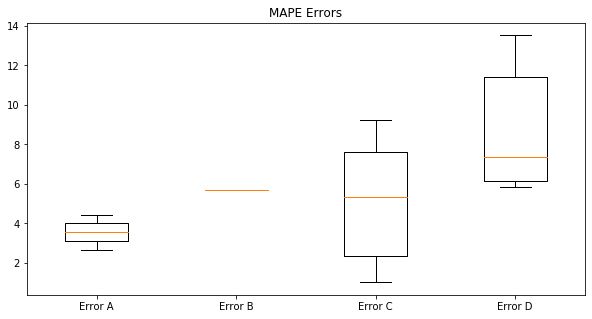

In [1107]:
plt.figure(figsize=(10,5))
plt.boxplot([error_a, error_b, error_c, list(errors.values())])

plt.xticks([1, 2, 3, 4], ['Error A', 'Error B', 'Error C', 'Error D'])
plt.title('MAPE Errors')

plt.show()

As we can see, the method see gives more trustable results as it has many instances and keeps a small rate of error when cpompared to the others. There also might be something wrong with part D, because it is very confusing to understand what ype of data we are predicting and fitting in the model.